<img style="float: right;" src="images/Earthwave_logo.png" alt="earthwave" width="90"/> <img style="float: right;" src="images/UZH_logo.jpg" alt="uzh" width="200"/> <img style="float: right;" src="images/ESA_logo.png" alt="esa" width="150"/>

<img src="images/GlaMBIE_logo.png" alt="logo" width="400"/>

#<strong><font color='#11847C'> Gla</font>cier <font color='#11847C'>M</font>ass <font color='#11847C'>B</font>alance <font color='#11847C'>I</font>ntercomparison <font color='#11847C'>E</font>xercise - *A community effort to reconcile measurements of glacier mass balance*</strong>

##This Jupyter Notebook can be used to explore and visualise the final results from the Glacier Mass Balance Intercomparison Exercise (GlaMBIE). In the following code, you can produce plots that demonstrate the global results from the GlaMBIE project. You can also investigate the contributions from individual regions to the global picture.

<div>

## <strong>Getting started</strong>
</div>

First, we import the necessary packages

In [1]:
import pandas as pd
import glob, os

from helpers import glambie_regions_dropdown, glambie_years_dropdown, derivative_to_cumulative, load_all_region_dataframes_cumulative
from plotting import global_cumulative_plot, global_comparison_region_plot, global_comparison_stacked_region_plot, histogram_of_region_contributions_to_global_loss, histogram_of_region_contributions_to_global_loss_two_years
import seaborn as sns
sns.set_theme(palette='Set2', style='whitegrid', font_scale=1.2)
colors_list = sns.color_palette(n_colors=18)

In [2]:
# This line is only necessary when running locally. Once data is available online, it will be downloaded in 
# above cell to the local Colab working directory, so won't need to add local path to the start of 'data_directory' below
local_path = '/data/ox1/working/glambie/demo_notebooks'

In [3]:
temporal_option = 'calendar_years'
data_directory = os.path.join(local_path, 'glambie_csvs_to_publish_v3', temporal_option)

In [4]:
global_dataframe = pd.read_csv(os.path.join(data_directory, '0_global.csv'))

In [5]:
cumulative_data_all_gt = derivative_to_cumulative(global_dataframe.start_dates, global_dataframe.end_dates, global_dataframe.combined_gt)
cumulative_errors_all_gt = derivative_to_cumulative(global_dataframe.start_dates, global_dataframe.end_dates, global_dataframe.combined_gt_errors, calculate_as_errors=True)

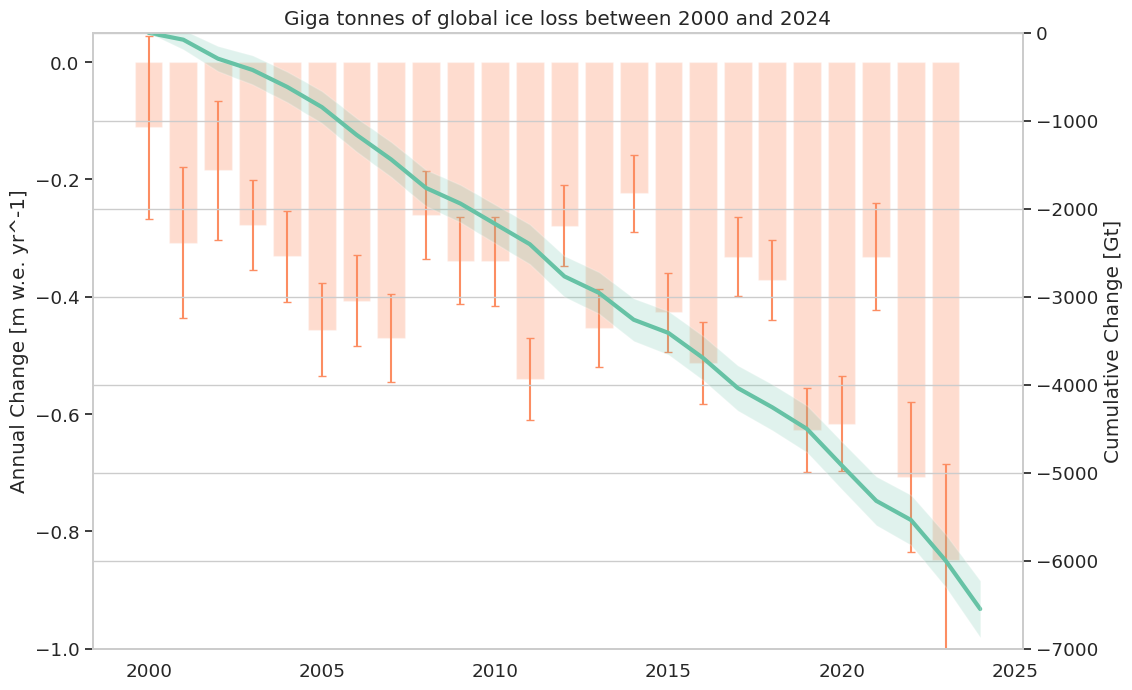

In [6]:
global_cumulative_plot(cumulative_data_all_gt, cumulative_errors_all_gt, global_dataframe, 'Gt', colors_list)

In [7]:
# Add multiple regions to plot to see contributions to global change
first_region = glambie_regions_dropdown()
first_region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & US': '2_western_canada_us', '…

In [8]:
second_region = glambie_regions_dropdown()
second_region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & US': '2_western_canada_us', '…

In [9]:
third_region = glambie_regions_dropdown()
third_region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & US': '2_western_canada_us', '…

In [10]:
list_of_csvs = sorted(glob.glob(os.path.join(data_directory, '*.csv')))
for filename in list_of_csvs:
    if first_region.value in filename:
        first_region_dataframe = pd.read_csv(filename)
    if second_region.value in filename:
        second_region_dataframe = pd.read_csv(filename)
    if third_region.value in filename:
        third_region_dataframe = pd.read_csv(filename)

cumulative_data_first_region_gt = derivative_to_cumulative(first_region_dataframe.start_dates, first_region_dataframe.end_dates, first_region_dataframe.combined_gt)
cumulative_errors_first_region_gt = derivative_to_cumulative(first_region_dataframe.start_dates, first_region_dataframe.end_dates, first_region_dataframe.combined_gt_errors, calculate_as_errors=True)

cumulative_data_second_region_gt = derivative_to_cumulative(second_region_dataframe.start_dates, second_region_dataframe.end_dates, second_region_dataframe.combined_gt)
cumulative_errors_second_region_gt = derivative_to_cumulative(second_region_dataframe.start_dates, second_region_dataframe.end_dates, second_region_dataframe.combined_gt_errors, calculate_as_errors=True)

cumulative_data_third_region_gt = derivative_to_cumulative(third_region_dataframe.start_dates, third_region_dataframe.end_dates, third_region_dataframe.combined_gt)
cumulative_errors_third_region_gt = derivative_to_cumulative(third_region_dataframe.start_dates, third_region_dataframe.end_dates, third_region_dataframe.combined_gt_errors, calculate_as_errors=True)

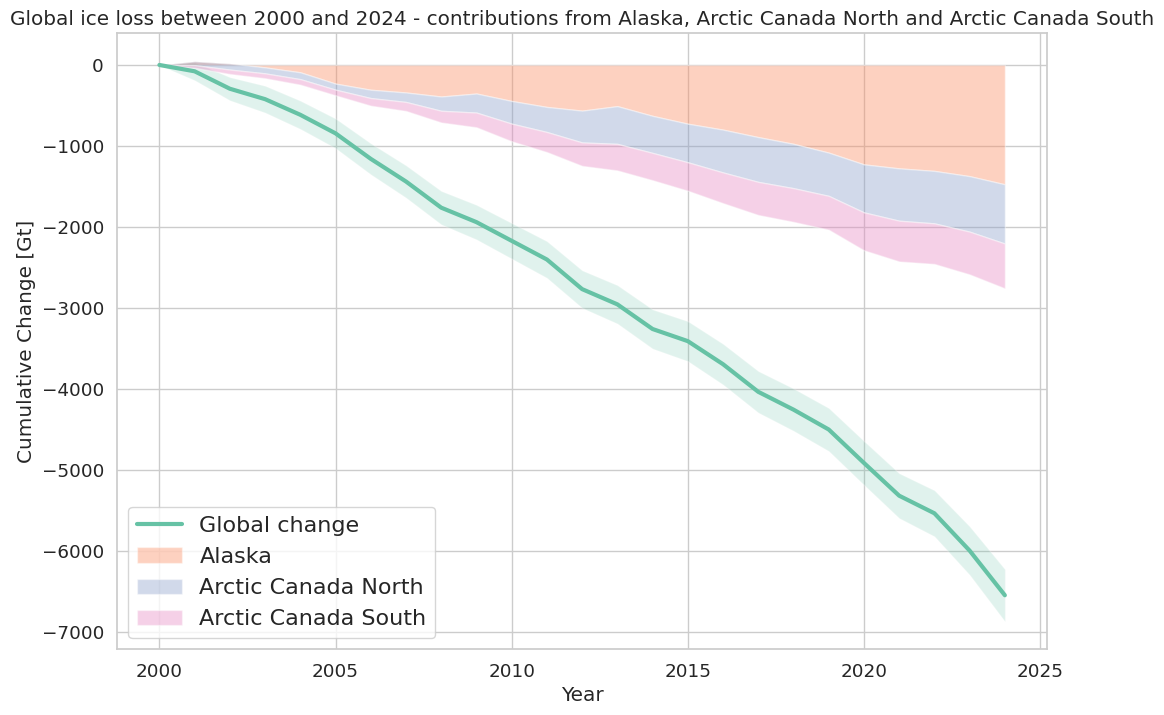

In [11]:
global_comparison_stacked_region_plot(cumulative_data_all_gt, cumulative_errors_all_gt, cumulative_data_first_region_gt, first_region.value, cumulative_data_second_region_gt, second_region.value, cumulative_data_third_region_gt, third_region.value,)

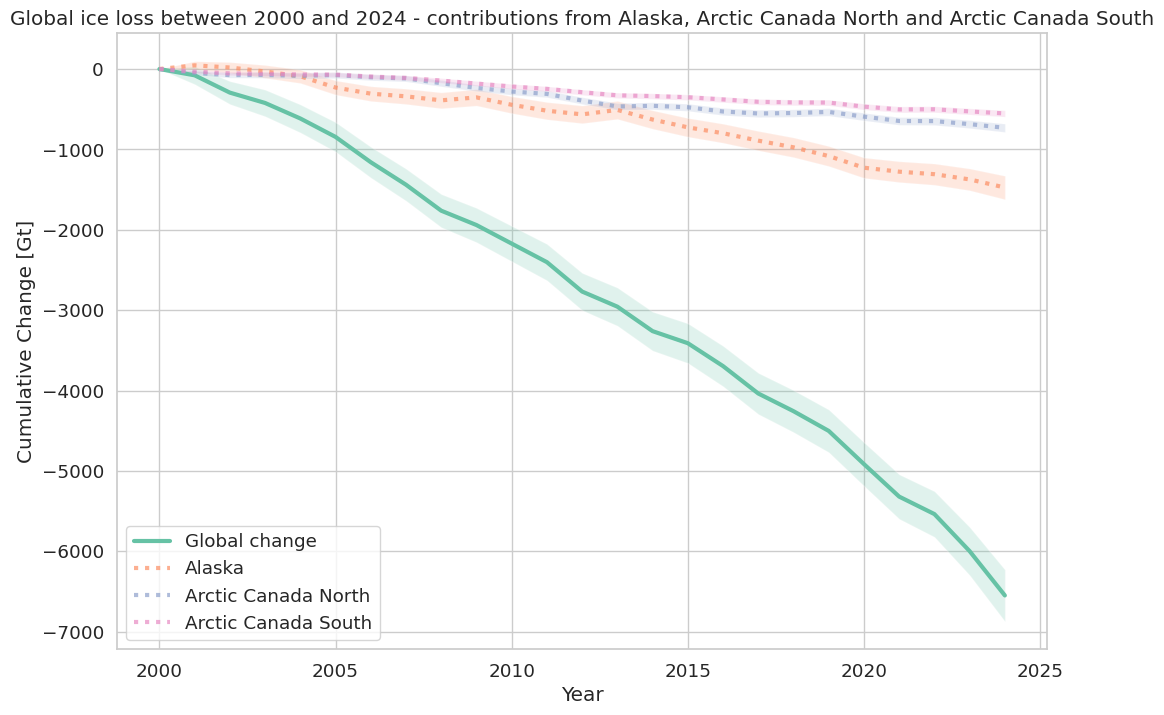

In [12]:
global_comparison_region_plot(cumulative_data_all_gt, cumulative_errors_all_gt, cumulative_data_first_region_gt, cumulative_errors_first_region_gt, first_region.value,
                              cumulative_data_second_region_gt, cumulative_errors_second_region_gt, second_region.value, cumulative_data_third_region_gt, cumulative_errors_third_region_gt, third_region.value, shaded=False)

In [13]:
# Choose a year and see contribtuion from every region to global trend
chosen_year = glambie_years_dropdown()
chosen_year

Dropdown(description='Year: ', options=(2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012…

In [14]:
glambie_dataframe_dict = load_all_region_dataframes_cumulative(data_directory)

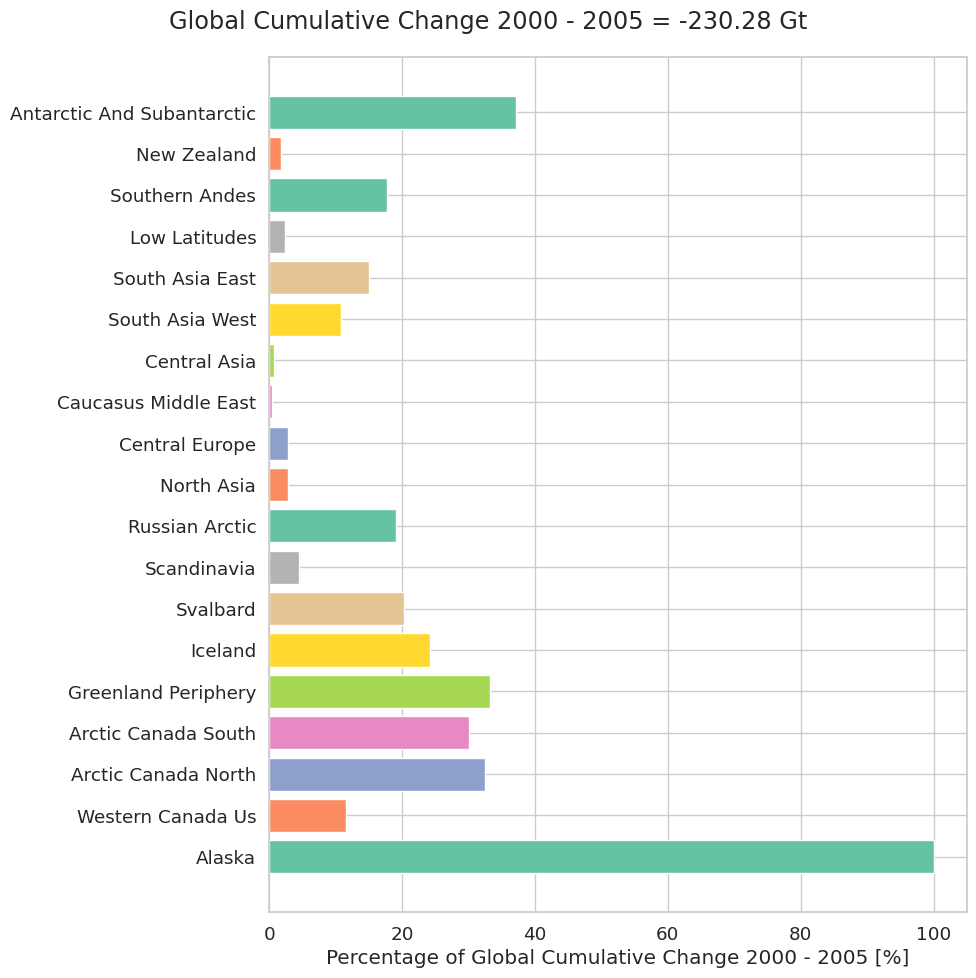

In [15]:
histogram_of_region_contributions_to_global_loss(glambie_dataframe_dict, chosen_year.value, colors_list)

In [16]:
comparsion_year = glambie_years_dropdown()
comparsion_year

Dropdown(description='Year: ', options=(2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012…

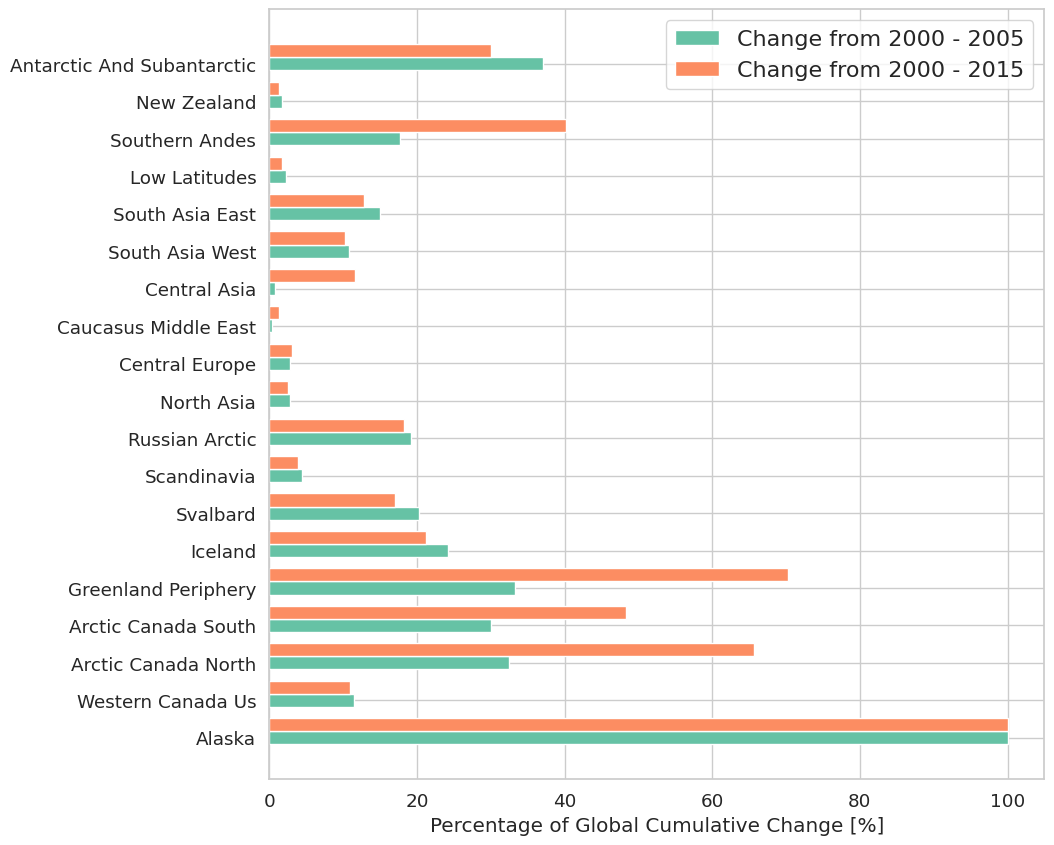

In [17]:
histogram_of_region_contributions_to_global_loss_two_years(glambie_dataframe_dict, chosen_year.value, comparsion_year.value)